In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = yf.download('SPY TDEX.BK GC=F BTC-USD',period='2y',interval='1d')

[*********************100%***********************]  4 of 4 completed


In [4]:
df = data.Close

In [5]:
df

,BTC-USD,GC=F,SPY,TDEX.BK
Date,,,,
2021-01-18,36630.074219,NaN,NaN,9.43
2021-01-19,36069.804688,1839.500000,378.649994,9.54
2021-01-20,35547.750000,1865.900024,383.890015,9.52
2021-01-21,30825.699219,1865.300049,384.239990,9.42
2021-01-22,33005.761719,1855.699951,382.880005,9.33
...,...,...,...,...
2023-01-14,20976.298828,NaN,NaN,NaN
2023-01-15,20880.798828,NaN,NaN,NaN
2023-01-16,21169.632812,1912.400024,NaN,10.00


array([[<AxesSubplot:xlabel='BTC-USD', ylabel='BTC-USD'>,
        <AxesSubplot:xlabel='GC=F', ylabel='BTC-USD'>,
        <AxesSubplot:xlabel='SPY', ylabel='BTC-USD'>,
        <AxesSubplot:xlabel='TDEX.BK', ylabel='BTC-USD'>],
       [<AxesSubplot:xlabel='BTC-USD', ylabel='GC=F'>,
        <AxesSubplot:xlabel='GC=F', ylabel='GC=F'>,
        <AxesSubplot:xlabel='SPY', ylabel='GC=F'>,
        <AxesSubplot:xlabel='TDEX.BK', ylabel='GC=F'>],
       [<AxesSubplot:xlabel='BTC-USD', ylabel='SPY'>,
        <AxesSubplot:xlabel='GC=F', ylabel='SPY'>,
        <AxesSubplot:xlabel='SPY', ylabel='SPY'>,
        <AxesSubplot:xlabel='TDEX.BK', ylabel='SPY'>],
       [<AxesSubplot:xlabel='BTC-USD', ylabel='TDEX.BK'>,
        <AxesSubplot:xlabel='GC=F', ylabel='TDEX.BK'>,
        <AxesSubplot:xlabel='SPY', ylabel='TDEX.BK'>,
        <AxesSubplot:xlabel='TDEX.BK', ylabel='TDEX.BK'>]], dtype=object)

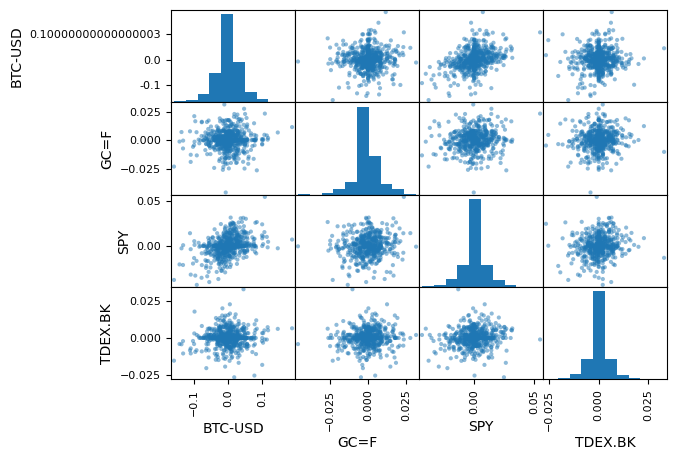

In [8]:
pd.plotting.scatter_matrix(df.pct_change())

array([[<AxesSubplot:xlabel='BTC-USD', ylabel='BTC-USD'>,
        <AxesSubplot:xlabel='GC=F', ylabel='BTC-USD'>,
        <AxesSubplot:xlabel='SPY', ylabel='BTC-USD'>,
        <AxesSubplot:xlabel='TDEX.BK', ylabel='BTC-USD'>],
       [<AxesSubplot:xlabel='BTC-USD', ylabel='GC=F'>,
        <AxesSubplot:xlabel='GC=F', ylabel='GC=F'>,
        <AxesSubplot:xlabel='SPY', ylabel='GC=F'>,
        <AxesSubplot:xlabel='TDEX.BK', ylabel='GC=F'>],
       [<AxesSubplot:xlabel='BTC-USD', ylabel='SPY'>,
        <AxesSubplot:xlabel='GC=F', ylabel='SPY'>,
        <AxesSubplot:xlabel='SPY', ylabel='SPY'>,
        <AxesSubplot:xlabel='TDEX.BK', ylabel='SPY'>],
       [<AxesSubplot:xlabel='BTC-USD', ylabel='TDEX.BK'>,
        <AxesSubplot:xlabel='GC=F', ylabel='TDEX.BK'>,
        <AxesSubplot:xlabel='SPY', ylabel='TDEX.BK'>,
        <AxesSubplot:xlabel='TDEX.BK', ylabel='TDEX.BK'>]], dtype=object)

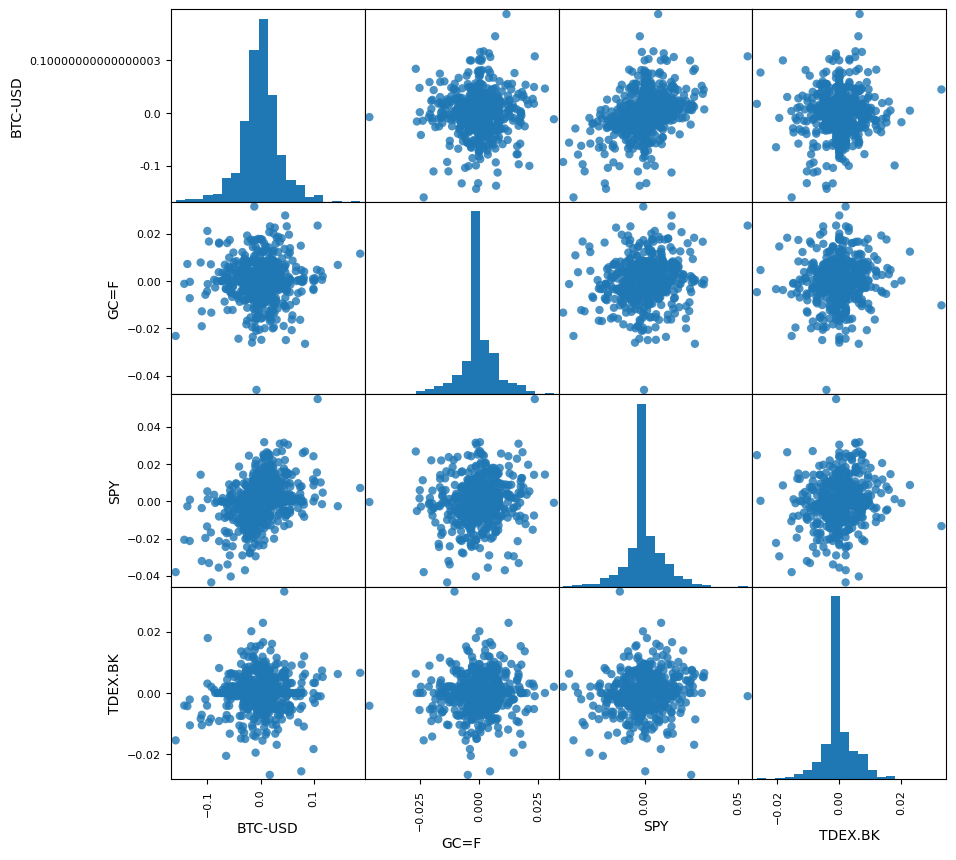

In [7]:
pd.plotting.scatter_matrix(df.pct_change(),figsize=(10,10),
                          marker='o',hist_kwds={'bins':20},alpha=0.8)

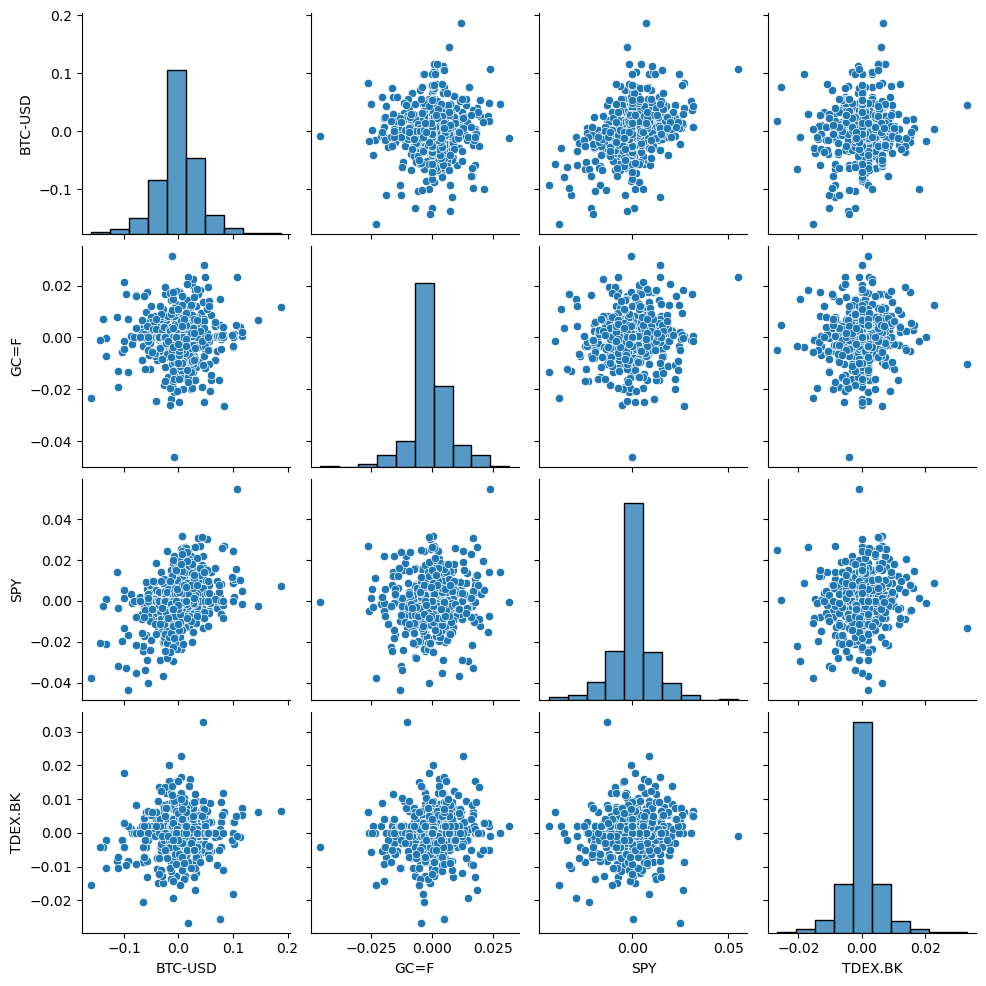

In [9]:
import seaborn as sns
sns.pairplot(df.pct_change(),diag_kws={'bins':10})

# inworking must clean data 
# have 2 alternative like 
# 1. fill na
# 2. dropna
# depends on how it effect

In [10]:
df.corr()
# we must use this mainly as normal in quant

,BTC-USD,GC=F,SPY,TDEX.BK
BTC-USD,1.000000,0.201025,0.619722,-0.141168
GC=F,0.201025,1.000000,0.401007,0.218327
SPY,0.619722,0.401007,1.000000,0.223087
TDEX.BK,-0.141168,0.218327,0.223087,1.000000


In [13]:
df.pct_change().corr()

,BTC-USD,GC=F,SPY,TDEX.BK
BTC-USD,1.000000,0.041015,0.395234,0.065255
GC=F,0.041015,1.000000,0.112285,0.074379
SPY,0.395234,0.112285,1.000000,0.129301
TDEX.BK,0.065255,0.074379,0.129301,1.000000


In [17]:
df['BTC-USD'].pct_change().corr(df['GC=F'].pct_change())

0.04101522059403099

<AxesSubplot:>

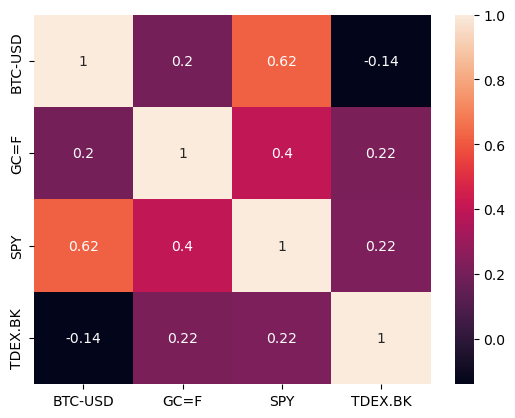

In [18]:
# plot heatmap
corr = df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns,annot=True)

In [19]:
thai_stock = yf.download('PTT.BK , PTTEP.BK, KBANK.BK, SCB.BK, BBL.BK, AOT.BK, BDMS.BK, RCL.BK, TTA.BK, PSL.BK',
                        period='2y',interval='1d')

[*********************100%***********************]  10 of 10 completed


In [20]:
df_thai_stock=thai_stock.Close

In [21]:
df_thai_stock.corr()

,AOT.BK,BBL.BK,BDMS.BK,KBANK.BK,PSL.BK,PTT.BK,PTTEP.BK,RCL.BK,SCB.BK,TTA.BK
AOT.BK,1.000000,0.807145,0.842124,0.571632,-0.269749,-0.539666,0.866211,-0.509478,-0.012068,-0.525221
BBL.BK,0.807145,1.000000,0.716496,0.822564,-0.364188,-0.410587,0.812480,-0.504539,0.149259,-0.669725
BDMS.BK,0.842124,0.716496,1.000000,0.425405,-0.027861,-0.729836,0.908819,-0.250670,0.081577,-0.465856
KBANK.BK,0.571632,0.822564,0.425405,1.000000,-0.339225,-0.068060,0.560908,-0.409041,0.420112,-0.676559
PSL.BK,-0.269749,-0.364188,-0.027861,-0.339225,1.000000,-0.106479,-0.123669,0.893098,0.065784,0.677827
PTT.BK,-0.539666,-0.410587,-0.729836,-0.068060,-0.106479,1.000000,-0.651350,0.136524,0.385229,0.336261
PTTEP.BK,0.866211,0.812480,0.908819,0.560908,-0.123669,-0.651350,1.000000,-0.345423,0.056225,-0.554135
RCL.BK,-0.509478,-0.504539,-0.250670,-0.409041,0.893098,0.136524,-0.345423,1.000000,0.190177,0.711558
SCB.BK,-0.012068,0.149259,0.081577,0.420112,0.065784,0.385229,0.056225,0.190177,1.000000,0.283669
TTA.BK,-0.525221,-0.669725,-0.465856,-0.676559,0.677827,0.336261,-0.554135,0.711558,0.283669,1.000000


In [23]:
df_thai_stock.pct_change().corr()

,AOT.BK,BBL.BK,BDMS.BK,KBANK.BK,PSL.BK,PTT.BK,PTTEP.BK,RCL.BK,SCB.BK,TTA.BK
AOT.BK,1.000000,0.392410,0.225898,0.373744,0.122101,0.345769,0.156314,0.089739,0.128456,0.112103
BBL.BK,0.392410,1.000000,0.116406,0.747986,0.080074,0.347343,0.196120,0.065477,0.267699,0.126880
BDMS.BK,0.225898,0.116406,1.000000,0.065282,0.068436,0.105093,0.049714,0.077008,0.104069,0.025132
KBANK.BK,0.373744,0.747986,0.065282,1.000000,0.054697,0.307678,0.142291,0.043617,0.236645,0.090638
PSL.BK,0.122101,0.080074,0.068436,0.054697,1.000000,0.160929,0.129351,0.548575,0.142556,0.734691
PTT.BK,0.345769,0.347343,0.105093,0.307678,0.160929,1.000000,0.540747,0.105653,0.086550,0.171238
PTTEP.BK,0.156314,0.196120,0.049714,0.142291,0.129351,0.540747,1.000000,0.035012,0.127427,0.145735
RCL.BK,0.089739,0.065477,0.077008,0.043617,0.548575,0.105653,0.035012,1.000000,0.113764,0.521918
SCB.BK,0.128456,0.267699,0.104069,0.236645,0.142556,0.086550,0.127427,0.113764,1.000000,0.173264
TTA.BK,0.112103,0.126880,0.025132,0.090638,0.734691,0.171238,0.145735,0.521918,0.173264,1.000000


<AxesSubplot:>

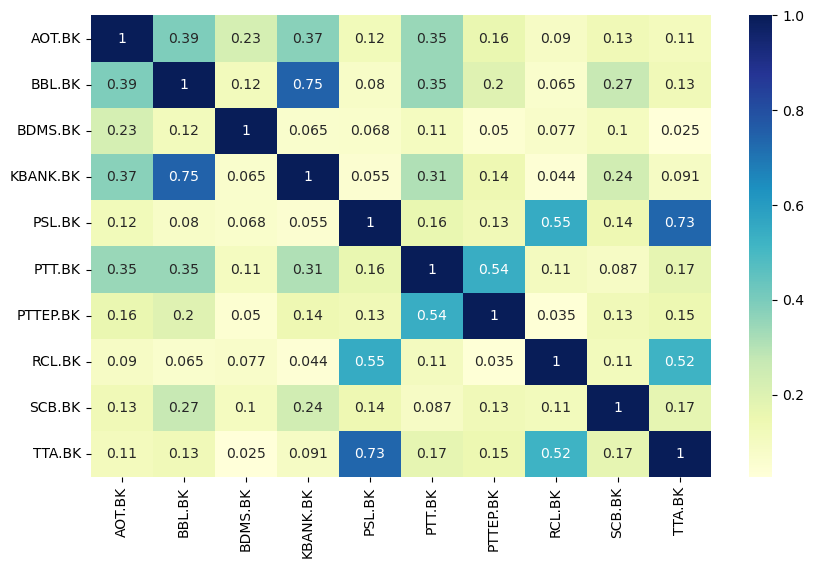

In [25]:
thai_corr =df_thai_stock.pct_change().corr()
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(thai_corr,
           xticklabels=thai_corr.columns,
           yticklabels=thai_corr.columns,
           annot=True,cmap='YlGnBu'
           )

# will create right correlation

In [27]:
df['SPY'].corr(df['GC=F'])

0.40100728292000726

In [28]:
df['SPY'].rolling(20).corr(df['GC=F'])

Date
2021-01-18   NaN
2021-01-19   NaN
2021-01-20   NaN
2021-01-21   NaN
2021-01-22   NaN
              ..
2023-01-14   NaN
2023-01-15   NaN
2023-01-16   NaN
2023-01-17   NaN
2023-01-18   NaN
Freq: D, Length: 731, dtype: float64

In [29]:
df = df.fillna(method='ffill')

In [30]:
df['SPY'].rolling(20).corr(df['GC=F'])

Date
2021-01-18         NaN
2021-01-19         NaN
2021-01-20         NaN
2021-01-21         NaN
2021-01-22         NaN
                ...   
2023-01-14    0.913258
2023-01-15    0.944056
2023-01-16    0.949215
2023-01-17    0.947424
2023-01-18    0.950127
Freq: D, Length: 731, dtype: float64

<AxesSubplot:xlabel='Date'>

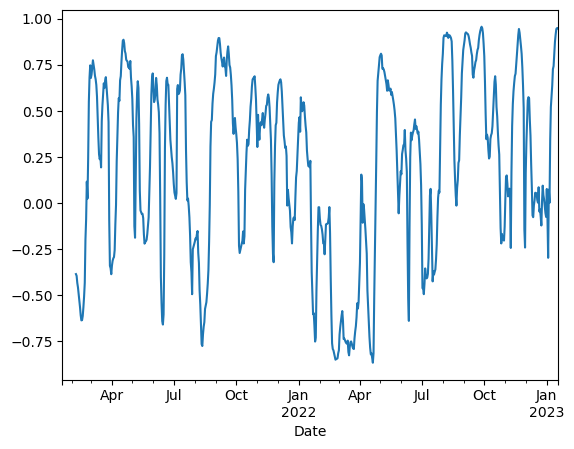

In [31]:
df['SPY'].rolling(20).corr(df['GC=F']).plot()

<AxesSubplot:xlabel='Date'>

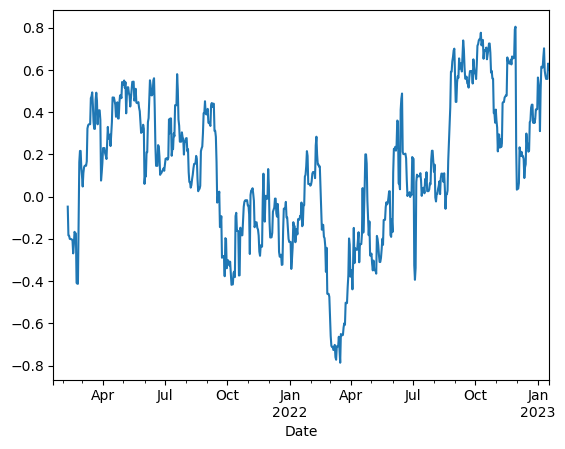

In [35]:
df['SPY'].pct_change().rolling(20).corr(df['GC=F'].pct_change()).plot()


<AxesSubplot:xlabel='Date'>

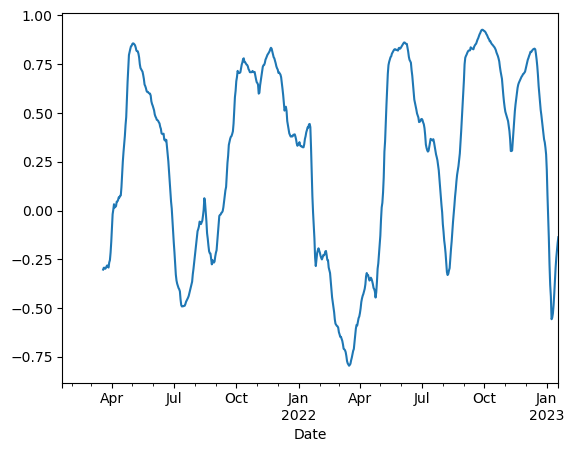

In [32]:
df['SPY'].rolling(60).corr(df['GC=F']).plot()


In [36]:
df['SPY'].pct_change().rolling(20).corr(df['GC=F'].pct_change()).mean()
# mean 
# result is tell us 13% but is good for asset allocation

0.13014731433750656

<AxesSubplot:xlabel='Date'>

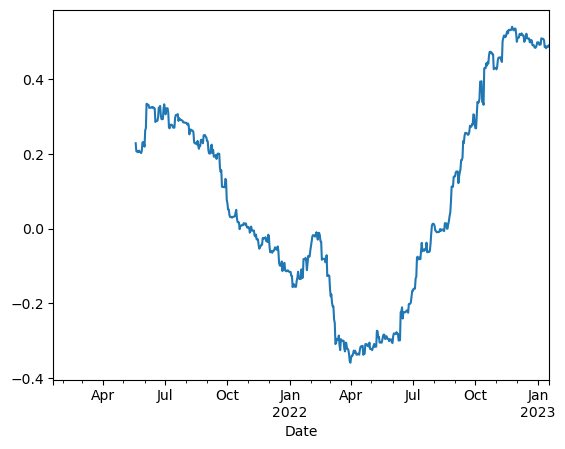

In [37]:
df['SPY'].pct_change().rolling(120).corr(df['GC=F'].pct_change()).plot()


In [42]:
df['SPY'].pct_change().rolling(120).corr(df['GC=F'].pct_change()).loc['2021':].mean()


0.08014448632629947

In [40]:
df.pct_change().corr()

,BTC-USD,GC=F,SPY,TDEX.BK
BTC-USD,1.000000,0.041015,0.395234,0.065255
GC=F,0.041015,1.000000,0.112285,0.074379
SPY,0.395234,0.112285,1.000000,0.129301
TDEX.BK,0.065255,0.074379,0.129301,1.000000


In [39]:
df['SPY'].pct_change().rolling(500).corr(df['GC=F'].pct_change())


Date
2021-01-18         NaN
2021-01-19         NaN
2021-01-20         NaN
2021-01-21         NaN
2021-01-22         NaN
                ...   
2023-01-14    0.089331
2023-01-15    0.089533
2023-01-16    0.089734
2023-01-17    0.089824
2023-01-18    0.089507
Freq: D, Length: 731, dtype: float64

In [ ]:
# plot graph 

array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

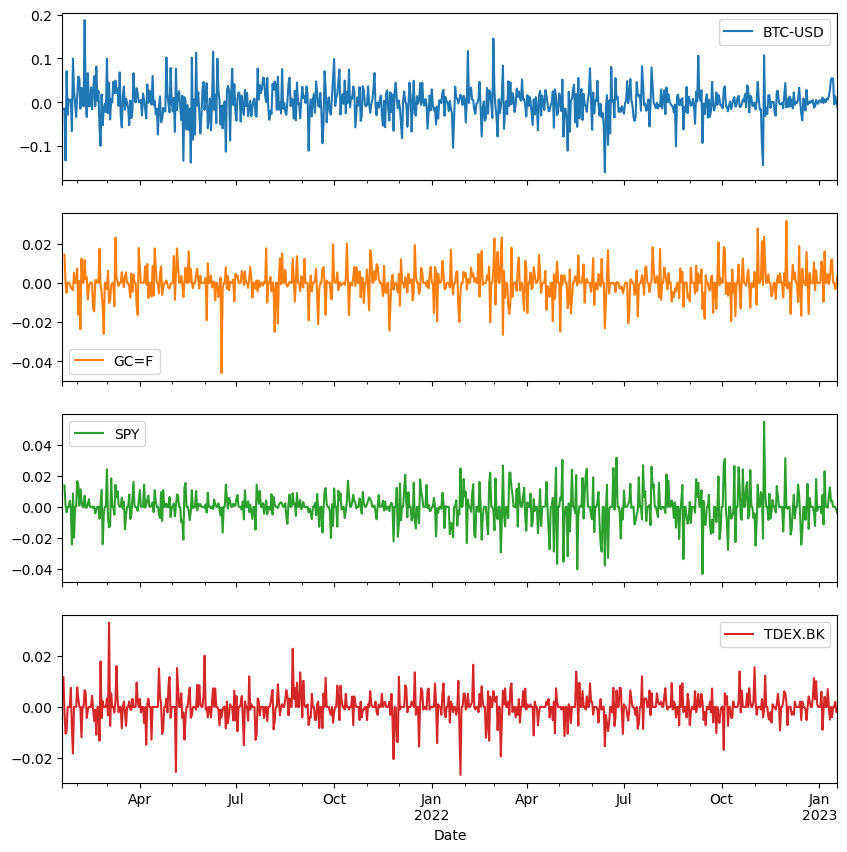

In [50]:
df.pct_change().plot(subplots=True,layout =(4,1),figsize=(10,10))

array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

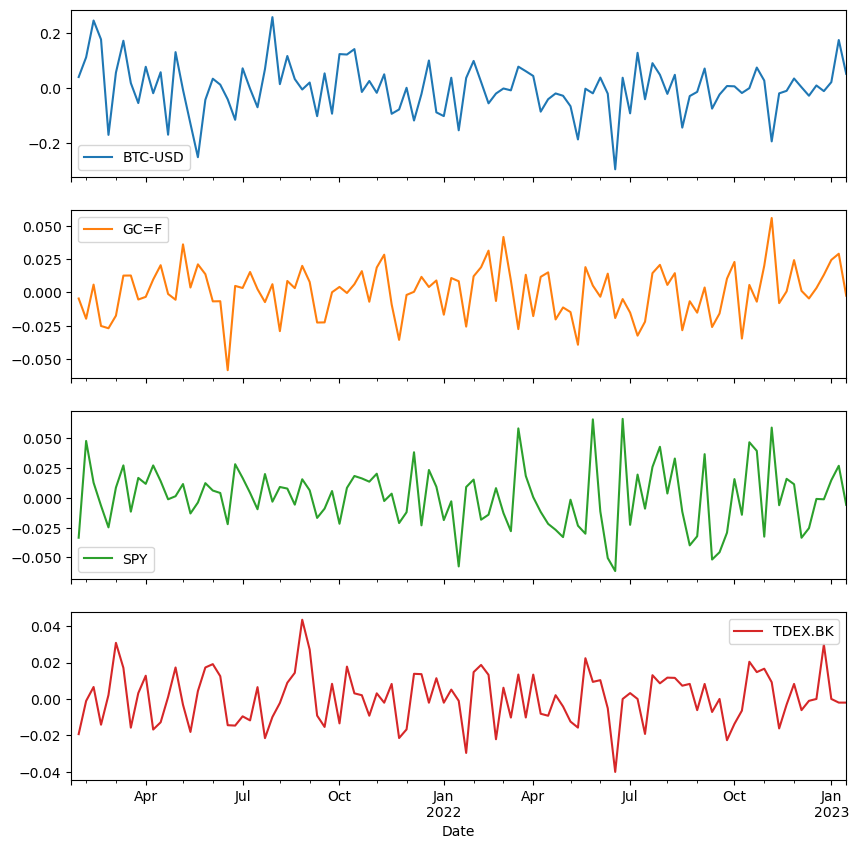

In [52]:
df.resample('W-FRI').last().pct_change().plot(subplots=True,layout=(4,1),figsize=(10,10))

In [ ]:
# let try  some weekly bussiness day correlation


In [43]:
df_weekly=df.resample('B').last()
df

,BTC-USD,GC=F,SPY,TDEX.BK
Date,,,,
2021-01-18,36630.074219,NaN,NaN,9.43
2021-01-19,36069.804688,1839.500000,378.649994,9.54
2021-01-20,35547.750000,1865.900024,383.890015,9.52
2021-01-21,30825.699219,1865.300049,384.239990,9.42
2021-01-22,33005.761719,1855.699951,382.880005,9.33
...,...,...,...,...
2023-01-14,20976.298828,1918.400024,398.500000,9.98
2023-01-15,20880.798828,1918.400024,398.500000,9.98
2023-01-16,21169.632812,1912.400024,398.500000,10.00


In [44]:
df.pct_change(5).corr()

,BTC-USD,GC=F,SPY,TDEX.BK
BTC-USD,1.000000,0.026664,0.440380,0.166890
GC=F,0.026664,1.000000,0.185764,0.158223
SPY,0.440380,0.185764,1.000000,0.266475
TDEX.BK,0.166890,0.158223,0.266475,1.000000


In [45]:
df.pct_change().corr()

,BTC-USD,GC=F,SPY,TDEX.BK
BTC-USD,1.000000,0.041015,0.395234,0.065255
GC=F,0.041015,1.000000,0.112285,0.074379
SPY,0.395234,0.112285,1.000000,0.129301
TDEX.BK,0.065255,0.074379,0.129301,1.000000


# this example about weekly for 1y ,2y ,3y ,4y

In [47]:
df_weekly_year=df.resample('W-FRI').last()
df_weekly_year

,BTC-USD,GC=F,SPY,TDEX.BK
Date,,,,
2021-01-22,33005.761719,1855.699951,382.880005,9.33
2021-01-29,34316.386719,1847.300049,370.070007,9.15
2021-02-05,38144.308594,1810.900024,387.709991,9.14
2021-02-12,47504.851562,1821.599976,392.640015,9.20
2021-02-19,55888.132812,1775.800049,390.029999,9.07
...,...,...,...,...
2022-12-23,16796.953125,1795.900024,382.910004,9.71
2022-12-30,16602.585938,1819.699951,382.429993,10.00
2023-01-06,16951.968750,1864.199951,388.079987,10.00


In [48]:
df_weekly_year.pct_change().corr()

,BTC-USD,GC=F,SPY,TDEX.BK
BTC-USD,1.000000,0.102647,0.335155,0.172790
GC=F,0.102647,1.000000,0.238972,0.296311
SPY,0.335155,0.238972,1.000000,0.293393
TDEX.BK,0.172790,0.296311,0.293393,1.000000
